In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

test = pd.read_csv("C:/Class/MLproject/test.csv")

In [19]:
test.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff'],
      dtype='object')

In [20]:
from datetime import date as dt
test['date'] = pd.to_datetime(test['date'])
test['dayname'] = test['date'].dt.day_name() #요일 변수 추가
test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,dayname
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,...,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Tuesday
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,...,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,...,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,Wednesday
228166,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wednesday
228167,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wednesday
228168,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wednesday


In [21]:
pd.DataFrame(test['dayname'].value_counts()).T

,Tuesday,Wednesday,Monday,Friday,Thursday,Saturday,Sunday
dayname,46450,40735,31624,31099,27761,26762,23739


In [28]:
rain_df = pd.read_csv("C:/Class/MLproject/OBS_ASOS_TIM_20230207224326.csv",encoding = "cp949")
rain_df.fillna(0)

,지점,지점명,일시,강수량(mm),강수량 QC플래그
0,184,제주,2019-10-01 00:00,0.0,9.0
1,184,제주,2019-10-01 04:00,0.0,0.0
2,184,제주,2019-10-01 05:00,4.7,0.0
3,184,제주,2019-10-01 06:00,0.4,0.0
4,184,제주,2019-10-01 07:00,0.7,0.0
...,...,...,...,...,...
415,189,서귀포,2019-10-15 20:00,0.0,9.0
416,189,서귀포,2019-10-15 21:00,0.0,9.0
417,189,서귀포,2019-10-15 22:00,0.0,9.0
418,189,서귀포,2019-10-15 23:00,0.0,9.0


In [29]:
rain_jeju = rain_df[rain_df["지점명"]=="제주"]
rain_seogwipo = rain_df[rain_df["지점명"]=="서귀포"]
rain_gosan = rain_df[rain_df["지점명"]=="고산"]
rain_seongsan = rain_df[rain_df["지점명"]=="성산"]

In [30]:
rain_jeju['date'] = pd.to_datetime(rain_jeju['일시'])
rain_jeju['day'] = rain_jeju['date'].dt.day

rain_seogwipo['date'] = pd.to_datetime(rain_seogwipo['일시'])
rain_seogwipo['day'] = rain_seogwipo['date'].dt.day

rain_gosan['date'] = pd.to_datetime(rain_gosan['일시'])
rain_gosan['day'] = rain_gosan['date'].dt.day

rain_seongsan['date'] = pd.to_datetime(rain_seongsan['일시'])
rain_seongsan['day'] = rain_seongsan['date'].dt.day

C:\Users\KWAK\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [31]:
jeju_sum = rain_jeju.groupby('day')['강수량(mm)'].sum().reset_index()
seogwipo_sum = rain_seogwipo.groupby('day')['강수량(mm)'].sum().reset_index()
gosan_sum = rain_gosan.groupby('day')['강수량(mm)'].sum().reset_index()
seongsan_sum = rain_seongsan.groupby('day')['강수량(mm)'].sum().reset_index()

# 제주도 강수량 데이터 (rain_jeju)
for i in range(1,17):
    if i not in list(jeju_sum['day']):
        jeju_sum.loc[len(jeju_sum)] = [i,0] # 결측치들을 비 안 온 걸로 간주해도 될까 ..?

rain_jeju = jeju_sum.sort_values(["day"], ascending = [True])
rain_jeju = rain_jeju.assign(date = pd.date_range("2019-10-01", "2019-10-16", freq="D"))
rain_jeju = rain_jeju.drop(['day'],axis = 1)

# 서귀포 강수량 데이터 (rain_seogwipo)
for i in range(1,17):
    if i not in list(seogwipo_sum['day']):
        seogwipo_sum.loc[len(seogwipo_sum)] = [i,0]

rain_seogwipo = seogwipo_sum.sort_values(["day"], ascending = [True])
rain_seogwipo = rain_seogwipo.assign(date = pd.date_range("2019-10-01", "2019-10-16", freq="D"))
rain_seogwipo = rain_seogwipo.drop(['day'],axis = 1)

# 고산 강수량 데이터 (rain_gosan)
for i in range(1,17):
    if i not in list(gosan_sum['day']):
        gosan_sum.loc[len(gosan_sum)] = [i,0]

rain_gosan = gosan_sum.sort_values(["day"], ascending = [True])
rain_gosan = rain_gosan.assign(date = pd.date_range("2019-10-01", "2019-10-16", freq="D"))
rain_gosan = rain_gosan.drop(['day'],axis = 1)

# 성산 강수량 데이터 (rain_seongsan)
for i in range(1,17):
    if i not in list(seongsan_sum['day']):
        seongsan_sum.loc[len(seongsan_sum)] = [i,0]

rain_seongsan = seongsan_sum.sort_values(["day"], ascending = [True])
rain_seongsan = rain_seongsan.assign(date = pd.date_range("2019-10-01", "2019-10-16", freq="D"))
rain_seongsan = rain_seongsan.drop(['day'],axis = 1)

In [32]:
rain_class = []

for i in range(16):
    if (rain_jeju.iloc[i,0] == 0):
        rain_class.append(0)
    elif (rain_jeju.iloc[i,0] > 0) & (rain_jeju.iloc[i,0] <= 7.2):
        rain_class.append(1)
    elif (rain_jeju.iloc[i,0] > 7.2) & (rain_jeju.iloc[i,0] <= 36):
        rain_class.append(2)
    elif (rain_jeju.iloc[i,0] > 36):
        rain_class.append(3)

rain_jeju["rain_class"] = rain_class

rain_class2 = []

for i in range(16):
    if (rain_seogwipo.iloc[i,0] == 0):
        rain_class2.append(0)
    elif (rain_seogwipo.iloc[i,0] > 0) & (rain_seogwipo.iloc[i,0] <= 7.2):
        rain_class2.append(1)
    elif (rain_seogwipo.iloc[i,0] > 7.2) & (rain_seogwipo.iloc[i,0] <= 36):
        rain_class2.append(2)
    elif (rain_seogwipo.iloc[i,0] > 36):
        rain_class2.append(3)

rain_seogwipo["rain_class"] = rain_class2

rain_class3 = [] 

for i in range(16):
    if (rain_gosan.iloc[i,0] == 0):
        rain_class3.append(0)
    elif (rain_gosan.iloc[i,0] > 0) & (rain_gosan.iloc[i,0] <= 7.2):
        rain_class3.append(1)
    elif (rain_gosan.iloc[i,0] > 7.2) & (rain_gosan.iloc[i,0] <= 36):
        rain_class3.append(2)
    elif (rain_gosan.iloc[i,0] > 36):
        rain_class3.append(3)
        
rain_gosan["rain_class"] = rain_class3

rain_class4 = []

for i in range(16):
    if (rain_seongsan.iloc[i,0] == 0):
        rain_class4.append(0)
    elif (rain_seongsan.iloc[i,0] > 0) & (rain_seongsan.iloc[i,0] <= 7.2):
        rain_class4.append(1)
    elif (rain_seongsan.iloc[i,0] > 7.2) & (rain_seongsan.iloc[i,0] <= 36):
        rain_class4.append(2)
    elif (rain_seongsan.iloc[i,0] > 36):
        rain_class4.append(3)
        
rain_seongsan["rain_class"] = rain_class4

In [33]:
rains = pd.merge(rain_jeju, rain_seogwipo, on='date')
rains = pd.merge(rains, rain_gosan, on = 'date')
rains = pd.merge(rains, rain_seongsan, on = 'date')
rains = rains.drop(['강수량(mm)_x','강수량(mm)_y'],axis =1)
rains.columns = ['date','jeju(n)','seogwipo(s)','gosan(w)','seongsan(e)']
rains["other(o)"] = [int(round(sum(rains.iloc[i][1:])/4,1)) for i in range(16)]
rains

C:\Users\KWAK\AppData\Local\Temp\ipykernel_21500\2848211257.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'강수량(mm)_x', 'rain_class_x'} in the result is deprecated and will raise a MergeError in a future version.
  rains = pd.merge(rains, rain_seongsan, on = 'date')


,date,jeju(n),seogwipo(s),gosan(w),seongsan(e),other(o)
0,2019-10-01,2,2,2,2,2
1,2019-10-02,3,3,3,3,3
2,2019-10-03,1,1,1,0,0
3,2019-10-04,0,0,0,0,0
4,2019-10-05,0,0,0,0,0
5,2019-10-06,1,1,0,1,0
6,2019-10-07,0,2,1,1,1
7,2019-10-08,0,0,0,0,0
8,2019-10-09,0,0,0,0,0
9,2019-10-10,0,0,0,0,0


In [34]:
region_class= []

for i in range (len(test)):
    if ((test["longitude"][i].item() <= 126.35) & (test["latitude"][i].item() < 33.5)):
        region_class.append('w')
    elif ((test["longitude"][i].item() > 126.35) & (test["longitude"][i].item() < 126.725) & (test["latitude"][i].item() < 33.32)):
        region_class.append('s')
    elif ((test["longitude"][i].item() >= 126.75)):
        region_class.append('e')
    elif ((test["longitude"][i].item() > 126.35) & (test["longitude"][i].item() < 126.725) & (test["latitude"][i].item() > 33.42)):
        region_class.append('n')
    else:
        region_class.append('o')

test['region'] = region_class

In [37]:
test['rain'] = 0


for i in range(len(test)):
    for j in range(16):
        if test.iloc[i,1] == rains.iloc[j,0]:
            if test.iloc[i,21] == 'e':
                test.iloc[i,22] = rains.iloc[j,4]
            elif test.iloc[i,21] == 'w':
                test.iloc[i,22] = rains.iloc[j,3]
            elif test.iloc[i,21] == 's':
                test.iloc[i,22] = rains.iloc[j,2]
            elif test.iloc[i,21] == 'n':
                test.iloc[i,22] = rains.iloc[j,1]
            else:
                test.iloc[i,22] = rains.iloc[j,5]
 

In [38]:
test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,dayname,region,rain
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Tuesday,n,2
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,n,2
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,n,2
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,n,2
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Tuesday,s,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,Wednesday,w,0
228166,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wednesday,w,0
228167,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wednesday,w,0
228168,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wednesday,n,0


In [41]:
ride_takeoff = test.groupby(['date','region']).sum()
ride_takeoff = ride_takeoff.drop(["id","bus_route_id","station_code","latitude","longitude"], axis=1)
ride_takeoff['ride'] = 0
ride_takeoff['takeoff']=0

# 지역별 매일 오전 승차 인원 수
for i in range (len(ride_takeoff)):
    for j in range (6):
        ride_takeoff.iloc[i,13] += ride_takeoff.iloc[i,j]

# 지역별 매일 하차 인원 수 
for i in range (len(ride_takeoff)):
    for j in range (6,11):
        ride_takeoff.iloc[i,14] += ride_takeoff.iloc[i,j]
        
ride_takeoff

6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  \
date       region                                                        
2019-10-01 e          274.0     729.0     696.0      584.0       601.0   
           n         2908.0   10275.0   10403.0     7827.0      6621.0   
           o           31.0     105.0     137.0      109.0        97.0   
           s          839.0    2617.0    2610.0     1871.0      1662.0   
           w          314.0     964.0     903.0      679.0       692.0   
...                     ...       ...       ...        ...         ...   
2019-10-16 e          253.0     544.0     480.0      455.0       405.0   
           n         3266.0    9999.0    8803.0     6457.0      5282.0   
           o           18.0      94.0      96.0       65.0        75.0   
           s          859.0    2671.0    2455.0     1626.0      1476.0   
           w          375.0     887.0     768.0      540.0       519.0   

                   11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
date       region                                                      
2019-10-01 e            532.0         55.0        284.0        370.0   
           n           6089.0       1059.0       3821.0       6409.0   
           o             83.0          8.0         38.0         72.0   
           s           1540.0        236.0        941.0       1470.0   
           w            618.0         68.0        410.0        686.0   
...                       ...          ...          ...          ...   
2019-10-16 e            398.0         61.0        223.0        331.0   
           n           5444.0       1248.0       3941.0       5835.0   
           o            100.0         31.0         50.0         95.0   
           s           1387.0        253.0       1070.0       1511.0   
           w            466.0         73.0        364.0        666.0   

                   9~10_takeoff  10~11_takeoff  11~12_takeoff   rain   ride  \
date       region                                                             
2019-10-01 e              332.0          428.0          433.0   2598   3416   
           n             5430.0         4626.0         4219.0  17762  44123   
           o               42.0           64.0           51.0    490    562   
           s             1133.0         1145.0          991.0   6730  11139   
           w              391.0          476.0          475.0   2950   4170   
...                         ...            ...            ...    ...    ...   
2019-10-16 e              275.0          310.0          340.0      0   2535   
           n             4616.0         3737.0         3736.0      0  39251   
           o               93.0          101.0           68.0      0    448   
           s             1002.0          917.0          918.0      0  10474   
           w              372.0          372.0          433.0      0   3555   

                   takeoff  
date       region           
2019-10-01 e          1469  
           n         21345  
           o           224  
           s          4925  
           w          2031  
...                    ...  
2019-10-16 e          1200  
           n         19377  
           o           370  
           s          4753  
           w          1847  

[80 rows x 15 columns]

In [42]:
test.to_csv("C:/Class/MLproject/test2.csv")

## 다중 선형 회귀

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:/Class/MLproject/train3.csv")
test = pd.read_csv("C:/Class/MLproject/test2.csv")

In [3]:
train

,Unnamed: 0,Unnamed: 0.1,id,date,bus_route_id,station_code,station_name,latitude,longitude,6~7_ride,...,region_n,region_o,region_s,region_w,in_out_시내,in_out_시외,rain_0,rain_1,rain_2,rain_3
0,0,0,0,2019-09-01,4270000,344,제주썬호텔,33.48990,126.49373,0.000000,...,1,0,0,0,0,1,0,0,1,0
1,1,1,1,2019-09-01,4270000,357,한라병원,33.48944,126.48508,0.352793,...,1,0,0,0,0,1,0,0,1,0
2,2,2,2,2019-09-01,4270000,432,정존마을,33.48181,126.47352,0.352793,...,1,0,0,0,0,1,0,0,1,0
3,3,3,3,2019-09-01,4270000,1579,제주국제공항(600번),33.50577,126.49252,0.000000,...,1,0,0,0,1,0,0,0,1,0
4,4,4,4,2019-09-01,4270000,1646,중문관광단지입구,33.25579,126.41260,0.000000,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,415418,415418,2019-09-30,32820000,1129,한림환승정류장(한림리),33.41437,126.26336,0.514321,...,0,0,0,1,1,0,0,0,0,1
415419,415419,415419,415419,2019-09-30,32820000,1564,제주시외버스터미널,33.49946,126.51479,0.514321,...,1,0,0,0,1,0,0,0,1,0
415420,415420,415420,415420,2019-09-30,32820000,2322,해병부대,33.23100,126.26273,0.000000,...,0,0,0,1,1,0,0,0,0,1
415421,415421,415421,415421,2019-09-30,32820000,3291,애월환승정류장(애월리),33.46483,126.31870,0.352793,...,0,0,0,1,1,0,0,0,0,1


In [4]:
from sklearn.model_selection import train_test_split

X = train[['id','bus_route_id','latitude','longitude', '6~7_ride','7~8_ride',
                 '8~9_ride','9~10_ride','10~11_ride','11~12_ride','6~7_takeoff',
                 '7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff','region_e',
       'region_n', 'region_o', 'region_s', 'region_w', 'in_out_시내',
       'in_out_시외', 'rain_0', 'rain_1', 'rain_2', 'rain_3']]


y = train[['18~20_ride']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [6]:
y_predict = lr.predict(X_test)

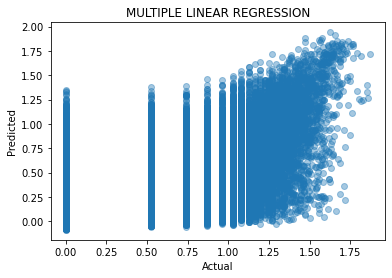

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show() 
#이게 뭐지 ????????

In [8]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.41398166337841547
0.41457287459770753


In [9]:
from dmba import regressionSummary
regressionSummary(y_test, lr.predict(X_test))


Regression statistics

               Mean Error (ME) : -0.0005
Root Mean Squared Error (RMSE) : 0.2981
     Mean Absolute Error (MAE) : 0.2157


훈련 세트와 테스트 세트 점수가 비슷하면 과소적합

## 릿지 회귀

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = train[['id','bus_route_id','latitude','longitude', '6~7_ride','7~8_ride',
                 '8~9_ride','9~10_ride','10~11_ride','11~12_ride','6~7_takeoff',
                 '7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff','region_e',
       'region_n', 'region_o', 'region_s', 'region_w', 'in_out_시내',
       'in_out_시외', 'rain_0', 'rain_1', 'rain_2', 'rain_3']]


y = train[['18~20_ride']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge().fit(X_train, y_train)

C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.07873e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [12]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.4151736229421604
0.4110953381466551


train 데이터셋의 정확도는 릿지 회귀가 더 높고,   
test 데이터셋의 정확도는 다중 선형 회귀가 아주 조금 더 높다.  
그럼 test 데이터셋의 정확도가 더 높은 다중 선형 회귀를 사용해야 하나?  
근데 그냥 정확도 자체가 너무 낮음 .. 

In [13]:
# alpha값이 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:f}".format(ridge10.score(X_test,y_test)))

훈련 세트의 정확도 : 0.415174
테스트 세트의 정확도 : 0.411096


C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.07409e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [14]:
# alpha값이 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:f}".format(ridge01.score(X_test,y_test)))

#왜 alpha값을 줄여도 정확도가 계속 똑같지

훈련 세트의 정확도 : 0.415174
테스트 세트의 정확도 : 0.411095


C:\Users\KWAK\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.0792e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [15]:
regressionSummary(y_test, ridge.predict(X_test))


Regression statistics

               Mean Error (ME) : -0.0010
Root Mean Squared Error (RMSE) : 0.2987
     Mean Absolute Error (MAE) : 0.2162
